# [Formação: Deep Learning com Pytorch](https://unibb.alura.com.br/formacao-deep-learning-pytorch)

In [1]:
import torch as t
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import choice

%matplotlib inline
%config IPCompleter.use_jedi = False

___
## Parte 1/3: Construindo e treinando uma rede neural

### [Redes Neurais: Deep Learning com PyTorch](https://unibb.alura.com.br/course/pln-deep-learning)

* ### Tensores

In [2]:
_ = [
        [
            [1, 1, 1],
            [1, 1, 1],
            [1, 1, 1],
        ],
        [
            [2, 2, 2],
            [2, 2, 2],
            [2, 2, 2],
        ],
        [
            [3, 3, 3],
            [3, 3, 3],
            [3, 3, 3],
        ],
]

t3x3x3 = t.Tensor(_)
t3x3x3

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]])

In [3]:
t3x3x3.shape

torch.Size([3, 3, 3])

In [4]:
_ = [
        [
            [1, 1, 1],
            [1, 1, 1],
            [1, 1, 1],
        ],
        [
            [2, 2, 2],
            [2, 2, 2],
            [2, 2, 2],
        ]
]

t2x3x3 = t.Tensor(_)
t2x3x3

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]])

In [5]:
t2x3x3.shape, t2x3x3.size()

(torch.Size([2, 3, 3]), torch.Size([2, 3, 3]))

In [6]:
t1 = t.randn(3,3,3)
t2 = t.randn(3,3,3)

t1, t2

(tensor([[[-0.4910, -1.3434, -0.6286],
          [ 0.5869, -0.2403,  1.6119],
          [ 0.4600,  0.6625, -0.3984]],
 
         [[ 0.2184, -1.0196, -0.2369],
          [ 0.7602,  0.0295,  0.3113],
          [-0.6391,  0.3137, -0.4883]],
 
         [[-0.0548, -2.4766,  0.5943],
          [ 1.4100, -2.0583, -1.1976],
          [-0.1796,  1.8979, -0.2562]]]),
 tensor([[[-0.1898,  0.9984,  0.5654],
          [ 0.4339,  0.6720, -0.7091],
          [ 0.3925,  1.0261,  0.3329]],
 
         [[-1.3809,  0.0680,  1.5121],
          [-0.2223,  0.9095, -0.9911],
          [-1.2955,  0.2843, -0.2981]],
 
         [[ 0.7948,  0.7543,  0.7432],
          [ 0.3883, -0.2462,  1.0003],
          [ 0.6177,  0.7868,  1.3186]]]))

In [7]:
v1 = t1[:, 0:2, 1:3]
v2 = t2[:, 0:2, 0:2]

v1.shape, v2.shape

(torch.Size([3, 2, 2]), torch.Size([3, 2, 2]))

In [8]:
v1, v2

(tensor([[[-1.3434, -0.6286],
          [-0.2403,  1.6119]],
 
         [[-1.0196, -0.2369],
          [ 0.0295,  0.3113]],
 
         [[-2.4766,  0.5943],
          [-2.0583, -1.1976]]]),
 tensor([[[-0.1898,  0.9984],
          [ 0.4339,  0.6720]],
 
         [[-1.3809,  0.0680],
          [-0.2223,  0.9095]],
 
         [[ 0.7948,  0.7543],
          [ 0.3883, -0.2462]]]))

In [9]:
v1 + v2

tensor([[[-1.5332,  0.3698],
         [ 0.1936,  2.2840]],

        [[-2.4005, -0.1689],
         [-0.1928,  1.2207]],

        [[-1.6818,  1.3486],
         [-1.6700, -1.4438]]])

In [10]:
L, C = 2, 3

In [11]:
_x, _y = t.ones(L, C) * 2, t.ones(C, L) * 3

try:
    _x * _y  # element-wise, i.e. elemento a elemento
except RuntimeError as e:
    print(f'{e}. Operção é Element-wise.')

The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1. Operção é Element-wise.


In [12]:
_ = np.dot(_x, _y) # produto matricial

print(_x)
print(_y)
print(_)

tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])
[[18. 18.]
 [18. 18.]]


In [13]:
_x, _y = t.ones(L, L) * 2, t.ones(C, C) * 3

try:
    np.dot(_x, _y)
except ValueError as e:
    print(e)

shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)


In [14]:
t1 = t.randn(7, 7, 3)
t2 = t.randn(174, 1)

t1.size(), t2.size()

(torch.Size([7, 7, 3]), torch.Size([174, 1]))

In [15]:
(t1.view(7*7*3) + t2).size()

torch.Size([174, 147])

- ### GPU

In [16]:
if t.cuda.is_available():
    d = t.device('cuda')
else:
    d = t.device('cpu')

print(f'>> {d}')

_ = v1 + v2
_.to(d)

>> cpu


tensor([[[-1.5332,  0.3698],
         [ 0.1936,  2.2840]],

        [[-2.4005, -0.1689],
         [-0.1928,  1.2207]],

        [[-1.6818,  1.3486],
         [-1.6700, -1.4438]]])

In [17]:
_tres = t.ones(3,3) * 3
_cinco = t.ones(3,3) * 5

In [18]:
_ = t.cat(tensors=[_tres, _cinco], dim=0)
_.size(), _

(torch.Size([6, 3]),
 tensor([[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         [5., 5., 5.],
         [5., 5., 5.],
         [5., 5., 5.]]))

In [19]:
_.shape, _.size()

(torch.Size([6, 3]), torch.Size([6, 3]))

In [20]:
_ = t.cat(tensors=[_tres, _cinco], dim=1)
_.size(), _

(torch.Size([3, 6]),
 tensor([[3., 3., 3., 5., 5., 5.],
         [3., 3., 3., 5., 5., 5.],
         [3., 3., 3., 5., 5., 5.]]))

- ### Classificação Linear

A equação básica da reta é dada por:

$ax + by + c = 0$.

Assim,

$y = \frac{(-ax - c)}{b}$

$y = - \frac{(ax + c)}{b}$

$y = - (\frac{a}{b} * x + \frac{c}{b})$

$y = (-\frac{a}{b}) * x + (-\frac{c}{b})$

tomando

- $w_1 = - \frac{a}{b}$
- $w_2 = - \frac{c}{b}$

então,

$y = w_1 * x + w_2$

Vamos escolher arbitrariamente $a = 2, b = -1, c = 4$

Então,

- $w1 = 2$
- $w_2 = 4$

e,

$y = 2*x + 4$

In [21]:
a, b, c = 2, -1, 4

w1, w2 = -a/b, -c/b

a, b, c, w1, w2

(2, -1, 4, 2.0, 4.0)

In [22]:
def y(x):
    return w1*x + w2

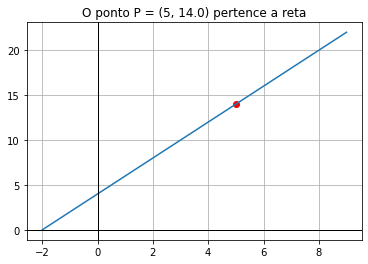

In [23]:
xs = range(-2, 10)
ys = [y(x) for x in xs]

p0 = (5, y(5))

plt.title(f'O ponto P = {p0} pertence a reta')

plt.plot(p0[0], p0[1], color='red', marker='o')
sns.lineplot(x=xs, y=ys)

plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid()
plt.show()

Outra forma de encarar a reta é, utilizá-la para encontrar pontos que pertencem ou não a esta. Uma vez que pontos pertencentes à reta são raízes da equação. Assim,

Sendo $r$ uma reta dada por

$r: a*x + b*y + c = 0$

se um ponto $P = (x_p, y_p)$ pertence à reta $r$, então

$a * x_p + b * y_p + c = 0$

Vamos utilzar a reta definida acima:

$y = 2x + 4$

ou,

$2x -y + 4 = 0$

In [24]:
def verifica_reta(p):
    _ =  2 * p[0] + c - p[1]
    if _ == 0:
        print(f'O ponto {p[0], p[1]} pertence a reta r')
    return _

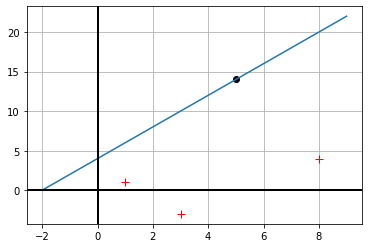

In [25]:
p0 = (5, 14.0)
p1 = (1, 1)
p2 = (3, -3)
p3 = (8, 4)

plt.plot(p0[0], p0[1], color='k', marker='o', markersize=6)
plt.plot(p1[0], p1[1], color='r', marker='+', markersize=8)
plt.plot(p2[0], p2[1], color='r', marker='+', markersize=8)
plt.plot(p3[0], p3[1], color='r', marker='+', markersize=8)
sns.lineplot(x=xs, y=ys)

plt.axhline(0, color='k', linewidth=2)
plt.axvline(0, color='k', linewidth=2)
plt.grid()
plt.show()

In [26]:
verifica_reta(p0)
verifica_reta(p1)
verifica_reta(p2)
verifica_reta(p3)

O ponto (5, 14.0) pertence a reta r


16

In [27]:
verifica_reta([2, 10])
verifica_reta([4, 15])
verifica_reta([1, 6])

O ponto (1, 6) pertence a reta r


0

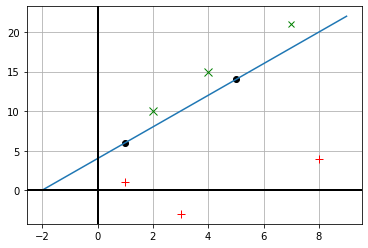

In [28]:
p0 = (5, 14.0)
p1 = (1, 1)
p2 = (3, -3)
p3 = (8, 4)

p4 = (2, 10)
p5 = (4, 15) 
p6 = (1, 6) 

plt.plot(p0[0], p0[1], color='k', marker='o', markersize=6)
plt.plot(p1[0], p1[1], color='r', marker='+', markersize=8)
plt.plot(p2[0], p2[1], color='r', marker='+', markersize=8)
plt.plot(p3[0], p3[1], color='r', marker='+', markersize=8)
plt.plot(p4[0], p4[1], color='g', marker='x', markersize=8)
plt.plot(p5[0], p5[1], color='g', marker='x', markersize=8)
plt.plot(p6[0], p6[1], color='k', marker='o', markersize=6)
plt.plot(7, 21, color='g', marker='x', markersize=6)
sns.lineplot(x=xs, y=ys)

plt.axhline(0, color='k', linewidth=2)
plt.axvline(0, color='k', linewidth=2)
plt.grid()
plt.show()

Perceba que $\forall P = (x_p, y_p)$, se $P$ está:

- **acima** da reta: `verifica_reta(p)` $< 0$;
- **abaixo** da reta: `verifica_reta(p)` $> 0$;
- **na reta**: `verifica_reta(p)` $= 0$

Então, onseguimos criar uma forma de separar pontos com relação à reta.

Vamos definir uma função para classificar os pontos a partir dessa lógica.

In [29]:
from sklearn.datasets import make_classification

(100, 2) (100,)


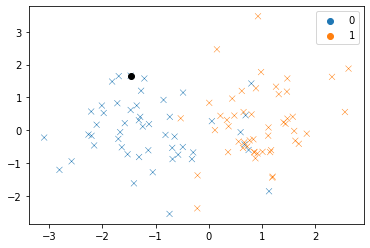

In [30]:
np.random.seed(333)

X, Y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1)

print(X.shape, Y.shape)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')

p = X[10, 0], X[10,1]
plt.plot(p[0], p[1], color='k', marker='o', markersize=6)

plt.show()

In [31]:
inter_horizontal = min(X[:, 0]), max(X[:, 0])
inter_vertical = min(X[:, 1]), max(X[:, 1])

inter_horizontal, inter_vertical

((-3.0900717720788897, 2.6230764988894526),
 (-2.549548906759625, 3.4703526048122812))

Será que o modelo anteior ($y$, onde $w_1 = 2$ e $w_2 = 4$) separa bem esses pontos?

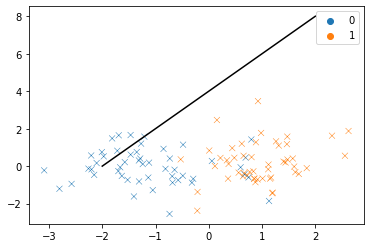

In [32]:
w1, w2 = 2, 4

def y(x):
    return w1 * x + w2

_ = np.linspace(start=-2, stop=2, num=10)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')
sns.lineplot(x=_, y=[y(__) for __ in _], color='k')

plt.show()

Parece que não.

Vamos tentar novos valores para $w_1, w_2$:

In [33]:
_ = np.linspace(start=-1, stop=1, num=10)

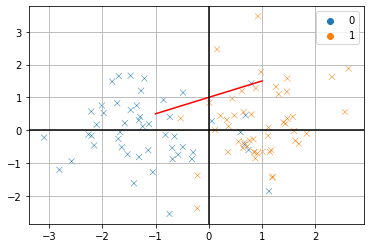

In [34]:
def procurar_coeficientes(w1, w2):

    def y(x):
        return w1 * x + w2

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')
    sns.lineplot(x=_, y=[y(__) for __ in _], color='r')

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid()
    plt.show()
    plt.show()

procurar_coeficientes(0.5, 1)

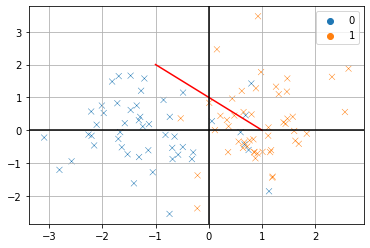

In [35]:
procurar_coeficientes(-1, 1)

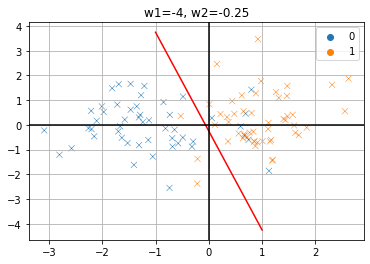

In [36]:
plt.title(f'w1={-4}, w2={-0.25}')
procurar_coeficientes(-4, -0.25)

Parece que temos um separador razoável.

Assim,

In [37]:
w1, w2 = -4, -0.25

In [38]:
def y(x, w1=w1, w2=w2):
    # y = w_1 * x + w_2
    return w1 * x + w2

def f(p, w1=w1, w2=w2):
    # w_1 * x + w_2 - y = 0, para todo x,y NA reta
    return w1*p[0] + w2 - p[1]

# Lembre que: y(x) <=> f(p)

P: (0.5, 1)
f(p) = -3.25

q: (-2, 3)
f(q) = 6.75



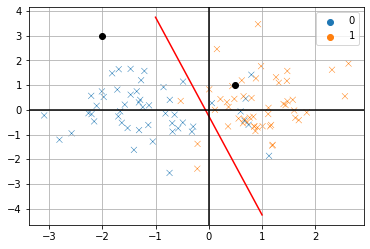

In [39]:
xp, yp = [0.5, 1]
fp = f((xp, yp))

xq, yq = [-2, 3]
fq = f((xq, yp))

print(f'P: {xp, yp}\nf(p) = {fp}\n')
print(f'q: {xq, yq}\nf(q) = {fq}\n')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')
sns.lineplot(x=_, y=[y(__) for __ in _], color='r')
plt.plot(xp, yp, color='k', marker='o')
plt.plot(xq, yq, color='k', marker='o')

xmin, xmax = plt.gca().get_xlim()
ymin, ymax = plt.gca().get_ylim()

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()
plt.show()
plt.show()

Então, para um ponto $p$:

- ### $f(p) > 0$, p está na classe $0$;
- ### $f(p) < 0$, p está na classe $1$

para $f(p) = 0$, vamos **definir arbitrariamente** que p está na classe $0$.

Já podemos criar nosso modelo de classificação:

In [40]:
def modelo_classificacao(p: tuple, w1, w2):
    resultado = w1*p[0] + w2 - p[1]
    if resultado >= 0:
        return 0
    elif resultado < 0:
        return 1
    else:
        return np.nan

In [41]:
np.random.seed(333)
dados = np.array([*zip(np.random.randn(100),np.random.randn(100))])

In [42]:
def plot_modelo_dados_e_pred(w1, w2):

    pred = [modelo_classificacao(p, w1, w2) for p in dados]

    # plot massa de dados
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x', legend=['', ''])

    # plot reta modelo
    sns.lineplot(x=_, y=[y(__, w1, w2) for __ in _], color='r')

    # plot da predição
    plot_pred = sns.scatterplot(x=dados[:, 0], y=dados[:, 1], hue=pred, marker='o', edgecolor='k')
    legend_labels, __= plot_pred.get_legend_handles_labels()
    plot_pred.legend(legend_labels, ['classe 0', 'classe 1', 'pred 0', 'pred 1'])

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid()

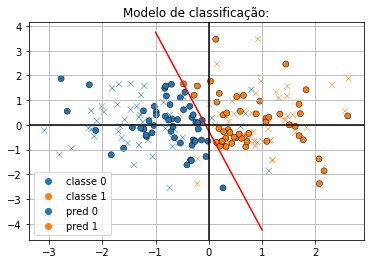

In [43]:
w1, w2 = -4, -0.25

plot_modelo_dados_e_pred(w1, w2)

plt.title('Modelo de classificação:')
plt.show()

Parece que nosso classificador funciona bem!

Vamos testar outros valores arbirários para $w_1, w_2$ e observar os resultados:

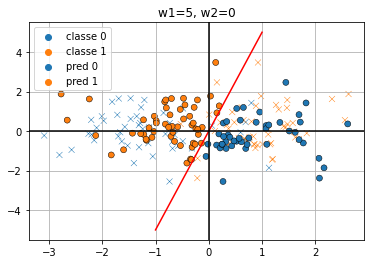

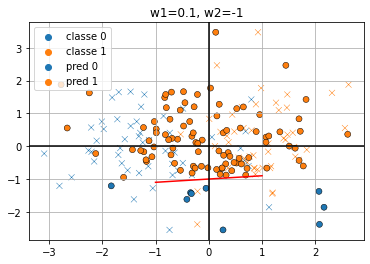

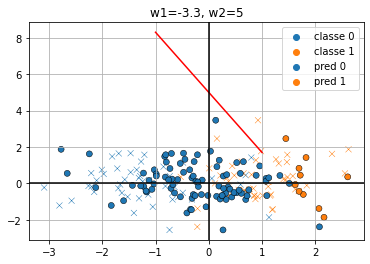

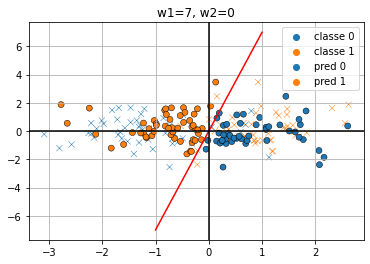

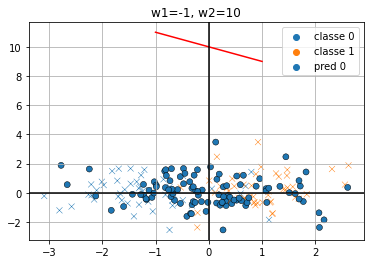

In [44]:
# PLT_ROWS, PLT_COLS, PLT_INDEX = 4, 4, 1

# fig = plt.Figure(figsize=(8, 8))

# for p in []:
#     plt.subplot(PLT_ROWS, PLT_COLS, PLT_INDEX)
#     plt.title('')
#     plt.imshow(p[0])
#     PLT_INDEX += 1

# plt.subplots_adjust(wspace=0.25, hspace=1.0)
# plt.show()

pares_w1_w2 = [(5, 0), (0.1, -1), (-3.3, 5), (7, 0), (-1, 10)]

for w1w2 in pares_w1_w2:
    _w1, _w2 = w1w2
    plt.title(f'w1={_w1}, w2={_w2}')
    plot_modelo_dados_e_pred(_w1, _w2)
    plt.show()

- ### Perceptron

In [45]:
from torch import nn

In [46]:
t.manual_seed(2)

perceptron = nn.Linear(in_features=3, out_features=1, bias=True)
perceptron

Linear(in_features=3, out_features=1, bias=True)

In [47]:
perceptron.weight

Parameter containing:
tensor([[ 0.1324, -0.1374,  0.1583]], requires_grad=True)

In [48]:
perceptron.bias

Parameter containing:
tensor([-0.0295], requires_grad=True)

In [49]:
[*perceptron.named_parameters()]

[('weight',
  Parameter containing:
  tensor([[ 0.1324, -0.1374,  0.1583]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([-0.0295], requires_grad=True))]

In [50]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

w1, w2, w3, b

(0.13243847, -0.13739452, 0.158326, array([-0.02948981], dtype=float32))

In [51]:
def inferencia_perceptron(p: tuple, perceptron):
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()
    return w1*p[0] + w2*p[1] + w3*p[2] + b

In [52]:
for ponto3d in [np.random.randn(3)*10 for x in range(3)]:
    i = inferencia_perceptron(ponto3d, perceptron)
    print(f'P={tuple(ponto3d)}\nInferência(P)=%.2f\n' % i)

P=(8.727504776169349, 10.76368283341693, -11.270488676293207)
Inferência(P)=-2.14

P=(21.49967730918722, -7.620707052871779, 6.051723290855473)
Inferência(P)=4.82

P=(-12.385078251915386, 17.773241484527944, 13.84574118217347)
Inferência(P)=-1.92



Aplicando:

In [53]:
np.random.seed(9)

X, Y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=1,
                           n_clusters_per_class=1)

- ### Ativações

Sigmoid:

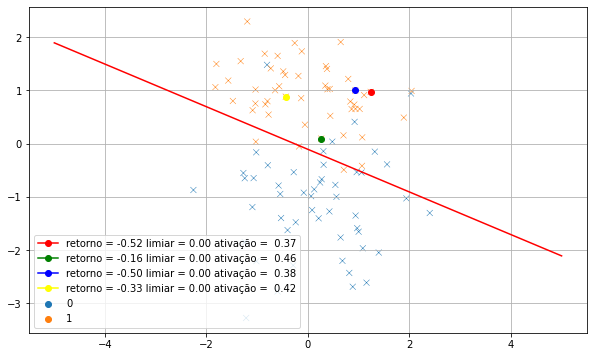

In [54]:
t.manual_seed(23)

perceptron = nn.Linear(in_features=2, out_features=1, bias=True)
activation = nn.Sigmoid()

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'yellow']
markers = ['o'] * 4

# dados X, Y
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')

# reta do perceptron
_ = np.linspace(-5, 5)
__ = [perceptron(t.Tensor([x,x])).data.numpy()[0] for x in _]
plt.plot(_, __, color='r')

# aplicando a inferência em dados de X
for i, i_x in enumerate([5, 37, 68, 99]):

    x_i = t.Tensor(X[i_x])

    forward = perceptron(x_i)
    activate = activation(forward)

    threshold = 0 if forward.data < 0 else 1

    label = 'retorno = {:5.2f}'.format(forward.data.numpy()[0])+\
            ' limiar = {:4.2f}'.format(threshold)+\
            ' ativação = {:5.2f}'.format(activate.data.numpy()[0])

    plt.plot(x_i[0], x_i[1], marker=markers[i], color=colors[i], label=label)
    

plt.grid()
plt.legend()
plt.show()

Tangente Hiperbólica:

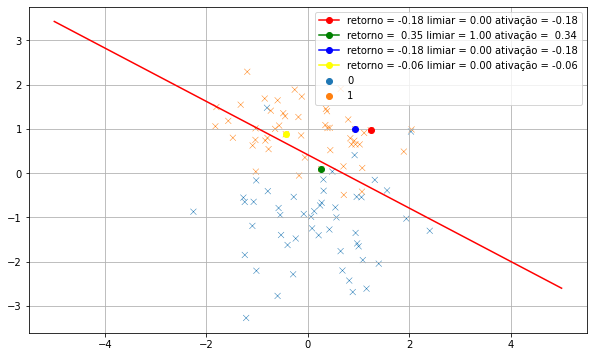

In [55]:
t.manual_seed(352)

perceptron = nn.Linear(in_features=2, out_features=1, bias=True)
activation = nn.Tanh()

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'yellow']
markers = ['o'] * 4

# dados X, Y
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')

# reta do perceptron
_ = np.linspace(-5, 5)
__ = [perceptron(t.Tensor([x,x])).data.numpy()[0] for x in _]
plt.plot(_, __, color='r')

# aplicando a inferência em dados de X
for i, i_x in enumerate([5, 37, 68, 99]):

    x_i = t.Tensor(X[i_x])

    forward = perceptron(x_i)
    activate = activation(forward)

    threshold = 0 if forward.data < 0 else 1

    label = 'retorno = {:5.2f}'.format(forward.data.numpy()[0])+\
            ' limiar = {:4.2f}'.format(threshold)+\
            ' ativação = {:5.2f}'.format(activate.data.numpy()[0])

    plt.plot(x_i[0], x_i[1], marker=markers[i], color=colors[i], label=label)
    

plt.grid()
plt.legend()
plt.show()

ReLU:

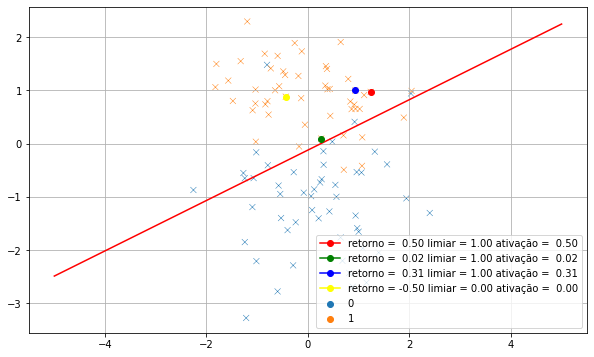

In [56]:
t.manual_seed(987)

perceptron = nn.Linear(in_features=2, out_features=1, bias=True)
activation = nn.ReLU()

plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'yellow']
markers = ['o'] * 4

# dados X, Y
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')

# reta do perceptron
_ = np.linspace(-5, 5)
__ = [perceptron(t.Tensor([x,x])).data.numpy()[0] for x in _]
plt.plot(_, __, color='r')

# aplicando a inferência em dados de X
for i, i_x in enumerate([5, 37, 68, 99]):

    x_i = t.Tensor(X[i_x])

    forward = perceptron(x_i)
    activate = activation(forward)

    threshold = 0 if forward.data < 0 else 1

    label = 'retorno = {:5.2f}'.format(forward.data.numpy()[0])+\
            ' limiar = {:4.2f}'.format(threshold)+\
            ' ativação = {:5.2f}'.format(activate.data.numpy()[0])

    plt.plot(x_i[0], x_i[1], marker=markers[i], color=colors[i], label=label)
    

plt.grid()
plt.legend()
plt.show()

- ### Problemas multiclasse

In [57]:
from sklearn.datasets import make_moons

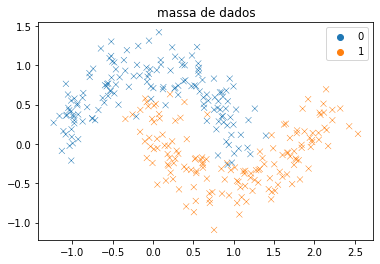

In [58]:
np.random.seed(7)

X, Y = make_moons(n_samples=300, noise=0.2)
X.shape, Y.shape

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, marker='x')

plt.title('massa de dados')
plt.show()

In [59]:
from torchsummary import summary

In [60]:
input_size, hidden_size, output_size = 2, 4, 1

net = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features=hidden_size*2),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size*2, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features=output_size)
)

print(net)

summary(model=net, input_size=(1, input_size))

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
              ReLU-2                 [-1, 1, 4]               0
            Linear-3                 [-1, 1, 8]              40
              ReLU-4                 [-1, 1, 8]               0
            Linear-5                 [-1, 1, 4]              36
              ReLU-6                 [-1, 1, 4]               0
            Linear-7                 [-1, 1, 1]               5
Total params: 93
Trainable params: 93
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB):

In [61]:
X_tensor = t.from_numpy(X).float()

In [62]:
pred = net(X_tensor)

In [63]:
pred.size(), pred.shape, pred[::35]

(torch.Size([300, 1]),
 torch.Size([300, 1]),
 tensor([[0.6149],
         [0.6182],
         [0.6212],
         [0.5952],
         [0.6083],
         [0.6074],
         [0.6129],
         [0.6221],
         [0.6117]], grad_fn=<SliceBackward0>))

In [64]:
class Rede(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        # definir a arquitetura
        super(Rede, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):  # override do nn.Module
        # gerar a saída
        hidden = self.hidden(X)
        relu = self.relu(hidden)
        output = self.output(relu)
        return output

dims = [2, 8, 1]
net = Rede(*dims)
net

Rede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [65]:
pred = net(X_tensor)
pred.size(), pred[::35]

(torch.Size([300, 1]),
 tensor([[-0.0788],
         [-0.1315],
         [-0.1803],
         [ 0.0111],
         [ 0.0644],
         [ 0.0055],
         [ 0.0355],
         [-0.1531],
         [ 0.0738]], grad_fn=<SliceBackward0>))

In [66]:
class RedeMaior(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(RedeMaior, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size*2)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size*2, hidden_size)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        _ = self.hidden1(X)
        _ = self.relu1(_)
        _ = self.hidden2(_)
        _ = self.relu1(_)
        _ = self.output(_)
        return _

dims = [2, 8, 1]  # input, hidden, output
net_maior = RedeMaior(*dims)

summary(net_maior, input_size=(1, dims[0]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]              48
              ReLU-2                [-1, 1, 16]               0
            Linear-3                 [-1, 1, 8]             136
              ReLU-4                 [-1, 1, 8]               0
            Linear-5                 [-1, 1, 1]               9
Total params: 193
Trainable params: 193
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [67]:
pred_maior = net_maior(X_tensor)
pred_maior.size()

torch.Size([300, 1])

___
### [Treinando uma Rede Neural: Deep Learning com PyTorch](https://unibb.alura.com.br/course/treinando-rede-neural-pytorch)

Uma $Loss$ function é, simplesmente, uma forma de - quantificar e -  penalizar o erro da classificação. A partir disso, compreendemos o quão distante a previsão está da classificação, e podemos utilizar como base para um _fator de atualização_ dos pesos do modelo.

"Há grande chances de que os resultados iniciais estejam distante do valor correto. Como nosso modelo é supervisionado, podemos avisar para o modelo qual o valor correto, e, assim, calcular a diferença entre o valor esperado e o valor obtido. Essa diferença, será chamada de perda (loss). Posteriormente, vamos somar todas as losses de todos os registros processados. Essa soma das perdas será chamada de custo (cost)." [[fonte: medium/@ia.bb](https://medium.com/@ia.bb/desmistificando-o-deep-learning-explica%C3%A7%C3%A3o-n%C3%A3o-t%C3%A9cnica-d9f6bf9cf41c)]

In [68]:
from sklearn.datasets import load_wine

In [69]:
_ = load_wine()
X, Y = _.data, _.target

X.shape, Y.shape

((178, 13), (178,))

In [70]:
features, targets = _.feature_names, _.target_names
features, targets

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [71]:
X[89]

array([1.208e+01, 1.330e+00, 2.300e+00, 2.360e+01, 7.000e+01, 2.200e+00,
       1.590e+00, 4.200e-01, 1.380e+00, 1.740e+00, 1.070e+00, 3.210e+00,
       6.250e+02])

In [72]:
pd.DataFrame(Y).value_counts()

1    71
0    59
2    48
dtype: int64

In [73]:
class ClfVinhos(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(ClfVinhos, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size, output_size)
        self.output = nn.Softmax(dim=1)  # dim NÃO é a quantidade de saídas

    def forward(self, X):
        _ = self.hidden1(X)
        _ = self.relu1(_)
        _ = self.hidden2(_)
        _ = self.output(_)
        return _

dims = [X.shape[1], 8, len(_.target_names)]
net = ClfVinhos(*dims)
net

ClfVinhos(
  (hidden1): Linear(in_features=13, out_features=8, bias=True)
  (relu1): ReLU()
  (hidden2): Linear(in_features=8, out_features=3, bias=True)
  (output): Softmax(dim=1)
)

In [74]:
loss_func = nn.CrossEntropyLoss()

In [75]:
X_tensor = t.from_numpy(X).float()
Y_tensor = t.from_numpy(Y).long()

X_tensor.size(), Y_tensor.size()

(torch.Size([178, 13]), torch.Size([178]))

In [76]:
X_tensor.dtype, Y_tensor.dtype

(torch.float32, torch.int64)

In [77]:
pred = net(X_tensor)

pred.shape

torch.Size([178, 3])

In [78]:
loss = loss_func(pred, Y_tensor)
loss

tensor(1.2818, grad_fn=<NllLossBackward0>)

Vamos fazer uma comparação rápida entre valores distintos para a quantidade de neurônios das hidden layers:

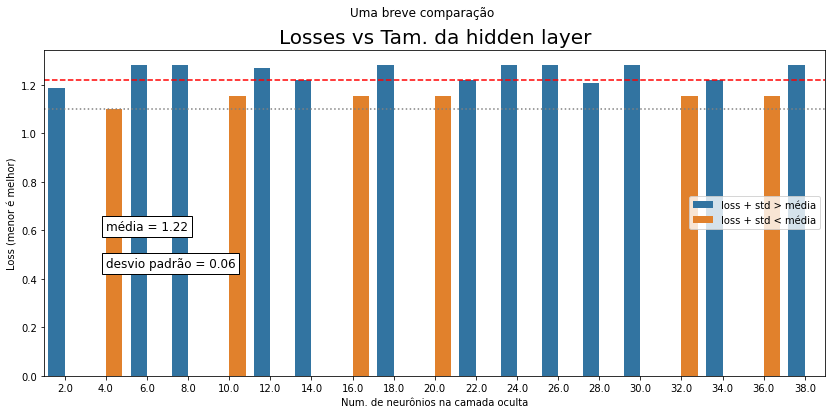

In [79]:
t.manual_seed(31)

saida = []
for n in range(2, 40, 2):
    dims = [X.shape[1], n, len(targets)]
    net = ClfVinhos(*dims)
    pred = net(X_tensor)
    loss = loss_func(pred, Y_tensor)
    saida.append((n, float(loss)))

saida = np.array(saida)

_std = np.std(saida[:, 1])
_mean = np.mean(saida[:, 1])
_hue = ['loss + std > média' if ((s + _std) > _mean ) else 'loss + std < média' for s in saida[:, 1]]

plt.figure(figsize=(14, 6))

dist = sns.barplot(
    x=saida[:, 0],
    y=saida[:, 1],
    hue=_hue
)
sns.move_legend(dist, "center right")

plt.axhline(y=_mean, color='r', linestyle='--')
plt.axhline(y=min(saida[:, 1]), color='gray', linestyle=':')

plt.title('Losses vs Tam. da hidden layer', fontsize=20)
plt.suptitle('Uma breve comparação')

_ = dict(size=12, color='k')
__ = dict(facecolor='white', alpha=1)
plt.text(x=1, y=.60, fontdict=_, bbox=__, s='média = {:.2f}'.format(_mean))
plt.text(x=1, y=.45, fontdict=_, bbox=__, s='desvio padrão = {:.2f}'.format(_std))
plt.ylabel('Loss (menor é melhor)')
plt.xlabel('Num. de neurônios na camada oculta')

plt.show()

Perceba que não há relação direta entre a quantidade de neurônios e a qualidade da rede.

- ### Regressão

In [80]:
from sklearn.datasets import load_diabetes

In [81]:
data, target = load_diabetes(return_X_y=True)

data.shape, target.shape

((442, 10), (442,))

In [82]:
data[0], target[0]

(array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]),
 151.0)

In [83]:
pd.DataFrame(target).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


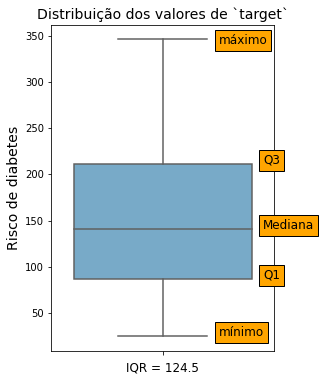

In [84]:
# valores obtidos a partir do método describe()

q1 = 87  # dict(pd.DataFrame(target).describe())[0]['25%']
q3 = 211.5
minimo = 25
maximo = 346
mediana = np.median(target)
iqr = q3 - q1

limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outlier_baixo = [x for x in target if x < limite_inf]
outlier_alto = [x for x in target if x > limite_sup]

if outlier_baixo:
    print('outliers inferiores: ', outlier_baixo)
if outlier_alto:
    print('outliers superiores: ', outlier_alto)


plt.figure(figsize=(4,6))

sns.boxplot(y=target, palette='Blues')

_ = dict(size=12, color='k')
__ = dict(facecolor='orange', alpha=1)

plt.title('Distribuição dos valores de `target`', fontsize=14)
plt.ylabel('Risco de diabetes', fontsize=14)
plt.xlabel(f'IQR = {iqr}', fontsize=12)

plt.text(x=.25, y=minimo, fontdict=_, bbox=__, s='mínimo')
plt.text(x=.45, y=q1, fontdict=_, bbox=__, s='Q1')
plt.text(x=.45, y=np.median(target), fontdict=_, bbox=__, s='Mediana')
plt.text(x=.45, y=q3, fontdict=_, bbox=__, s='Q3')
plt.text(x=.25, y=maximo-5, fontdict=_, bbox=__, s='máximo')

plt.show()

In [85]:
class MLP(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        # não faz sentido usar Softmax para regressão linear
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        _ = self.hidden1(X)
        _ = self.relu1(_)
        _ = self.output(_)
        return _

dims = [data.shape[1], 10, 1]
net = MLP(*dims)

summary(model=net, input_size=(1, data.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]             110
              ReLU-2                [-1, 1, 10]               0
            Linear-3                 [-1, 1, 1]              11
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [86]:
loss_func = nn.MSELoss()

In [87]:
X_tensor = t.from_numpy(data).float()
Y_tensor = t.from_numpy(target).float()

X_tensor.shape, Y_tensor.shape, 

(torch.Size([442, 10]), torch.Size([442]))

In [88]:
pred = net(X_tensor)
pred.shape

torch.Size([442, 1])

In [89]:
pred.shape, Y_tensor.shape  # igualar a dimensão

(torch.Size([442, 1]), torch.Size([442]))

In [90]:
loss = loss_func(pred.squeeze(), Y_tensor)
loss.data

tensor(29062.7129)

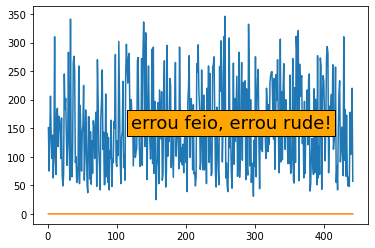

In [91]:
sns.lineplot(x=range(1,len(data)+1), y=target)
sns.lineplot(x=range(1,len(data)+1), y=pred.data.numpy()[:, 0])

_ = dict(size=18, color='k')
__ = dict(facecolor='orange', alpha=1)

plt.text(x=120, y=150, fontdict=_, bbox=__, s='errou feio, errou rude!')

plt.show()

- ### Backpropagation

_learning rate_ (taxa de aprendizagem): $\alpha$, é o **coeficiente** de atualização dos pesos.

_step size_: é o fator que dita **a cada quantas** iterações os pesos serão atualizados. ou seja, quantas iterações serão acumuladas até os pesos serem atualizados.

In [92]:
_ = load_wine()

data, target = _.data, _.target

data.shape, target.shape

((178, 13), (178,))

In [93]:
pd.DataFrame(target).value_counts()

1    71
0    59
2    48
dtype: int64

In [94]:
df = pd.DataFrame(data=data, columns=_.feature_names)
df.shape

(178, 13)

In [95]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [96]:
# %%time

# from PIL import Image

# _ = 'etc/pairplot_dataset_wine.jpg'

# try:
#     image = Image.open(_)
#     image.show()
# except FileNotFoundError as e:
#     plt.figure(figsize=(60,40))
#     fig = sns.pairplot(data=df)  # demora =~ 40s
#     plt.savefig(fname=_)
#     plt.close()
#     image = Image.open(_)
#     image.show()

# CPU times: user 42.1 s, sys: 429 ms, total: 42.6 s
# Wall time: 42.5 s

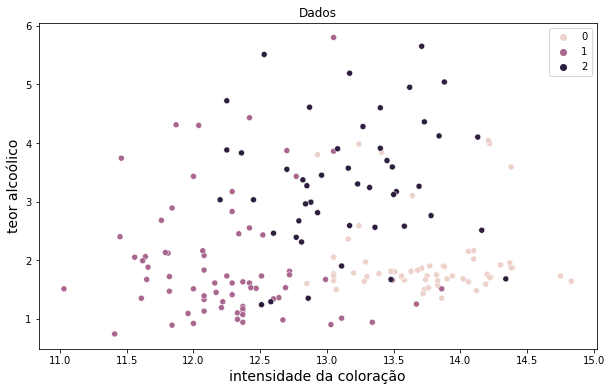

In [97]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=target)

plt.title('Dados')
plt.xlabel('intensidade da coloração', fontsize=14)
plt.ylabel('teor alcoólico', fontsize=14)

plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler

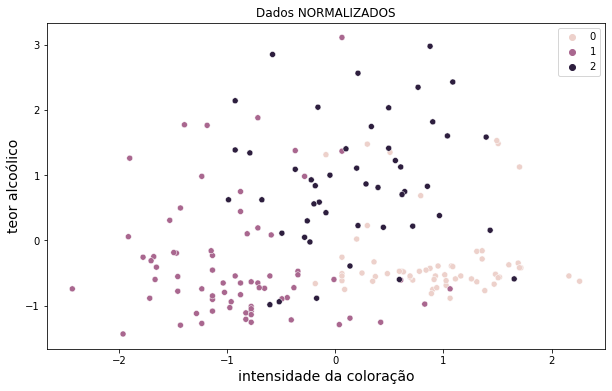

In [99]:
data_scaled = StandardScaler().fit_transform(data)

plt.figure(figsize=(10,6))

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=target)

plt.title('Dados NORMALIZADOS')
plt.xlabel('intensidade da coloração', fontsize=14)
plt.ylabel('teor alcoólico', fontsize=14)

plt.show()

Instanciando e treinando a rede:

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, stratify=target)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((133, 13), (133,), (45, 13), (45,))

In [102]:
xtrain = t.FloatTensor(xtrain)
xtest = t.FloatTensor(xtest)

ytrain = t.LongTensor(ytrain)
ytest = t.LongTensor(ytest)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

(torch.Size([133, 13]),
 torch.Size([133]),
 torch.Size([45, 13]),
 torch.Size([45]))

In [103]:
from torch import optim

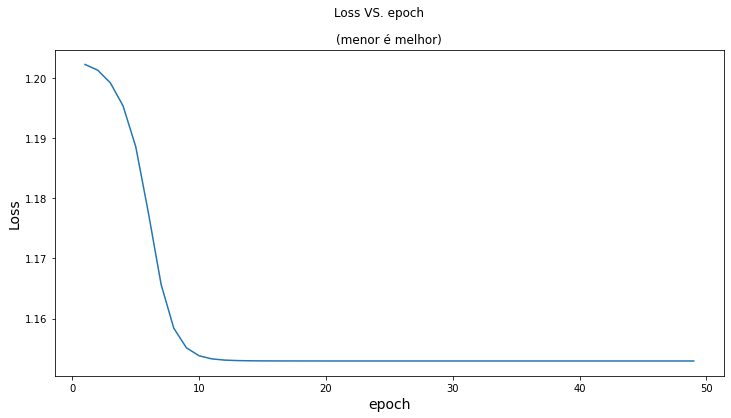

In [104]:
# %%time

t.manual_seed(1)

try:
    del net
except:
    pass

i, h, o = data.shape[-1], 32, 3

net = nn.Sequential(
    nn.Linear(i, h*2),
    nn.ReLU(),
    nn.Linear(h*2, h),
    nn.ReLU(),
    nn.Linear(h, o),
    nn.Softmax(dim=1)
    )

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=1e-3)

epochs = range(1, 50)
hist_loss = []

for e in epochs:
    pred = net(xtrain)
    loss = loss_func(pred, ytrain)
    hist_loss.append((e, loss.data.numpy()))
    loss.backward()
    optimizer.step()

hist_loss = np.array(hist_loss)

plt.figure(figsize=(12, 6))

sns.lineplot(x=hist_loss[:, 0], y=hist_loss[:, 1])

plt.suptitle('Loss VS. epoch', fontdict=dict(fontsize=18))
plt.title('(menor é melhor)')
plt.xlabel('epoch', fontdict=dict(fontsize=14))
plt.ylabel('Loss', fontdict=dict(fontsize=14))

plt.show()

# print(f'Análise da Loss:\n\n{pd.Series(hist_loss[:, 1]).describe()}')

In [105]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [106]:
pred_arg = [np.argmax(p.data.numpy()) for p in net(xtest)]

In [107]:
print(f"F1-Score = {f1_score(y_true=ytest, y_pred=pred_arg, average='macro'):.2f}")

F1-Score = 0.19


In [108]:
print(f'Accuracy = {accuracy_score(y_true=ytest, y_pred=pred_arg):.2f}')

Accuracy = 0.40


In [109]:
print(classification_report(y_true=ytest, y_pred=pred_arg, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.40      1.00      0.57        18
           2       0.00      0.00      0.00        12

    accuracy                           0.40        45
   macro avg       0.13      0.33      0.19        45
weighted avg       0.16      0.40      0.23        45



- ### MNIST

In [110]:
from torchvision import transforms
from torchvision.datasets import MNIST

(Na célula abaixo: Remover os comentários para baixar pela primeira vez!)

In [111]:
train_set = MNIST('datasets/',
              train=True,
              transform=transforms.ToTensor(),
#               download=True
             )

test_set = MNIST('datasets/',
                 train=False,
                 transform=transforms.ToTensor(),
#                  download=True
             )

# as vezes dá timeout...

In [112]:
len(train_set), len(test_set), 

(60000, 10000)

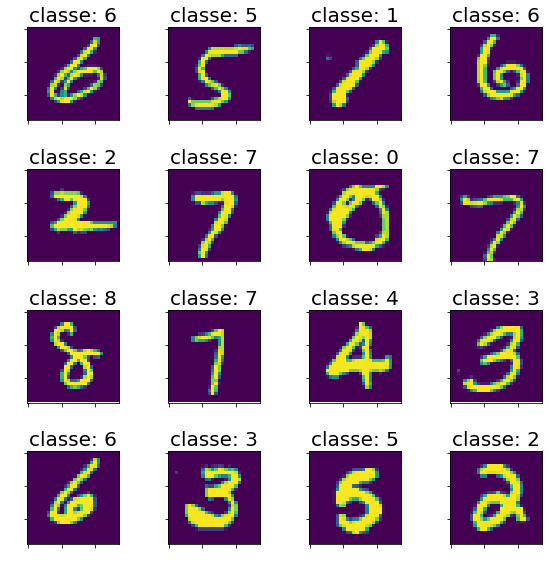

In [113]:
row, col, idx = 4, 4, 1

plt.figure(figsize=(8, 8))

for i in range(row * col):
    i, c = choice(train_set)
    plt.subplot(4, 4, idx)
    plt.imshow(i[0])
    plt.title(f'classe: {c}', fontdict=dict(fontsize=20))
    plt.xticks(color='w')
    plt.yticks(color='w')
    idx += 1

plt.tight_layout()  # deixa bonito!
plt.show()

In [114]:
from torch.utils.data import DataLoader

In [115]:
# batch_size=400, em virtude da demora (~20min)
_args = dict(batch_size=400, shuffle=True, num_workers=4)

train_loader = DataLoader(dataset=train_set, **_args)
test_loader = DataLoader(dataset=test_set, **_args)

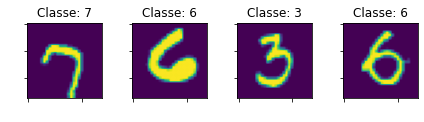

In [116]:
for batch in train_loader:

    dado, rotulo = batch

    plt.figure(figsize=(6, 4))

    row, col, idx = 1, 4, 1

    for i in range(row*col):
        plt.subplot(row, col, idx)
        plt.title(f'Classe: {rotulo[i].data.numpy()}')
        plt.imshow(dado[i][0])
        plt.xticks(color='w')
        plt.yticks(color='w')
        idx += 1

    plt.tight_layout()
    plt.show()

    break

In [117]:
class ModeloMNIST(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ModeloMNIST, self).__init__()
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
        )
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = X.view(X.size(0), -1)  # transformando em coluna [1, 784]
        _ = self.features(X)
        _ = self.out(_)
        _ = self.softmax(_)
        return _

In [118]:
from datetime import datetime

In [119]:
%%time

t.manual_seed(2)

try:
    del net
except:
    pass

dims = [
    train_set.data.size()[-2:][0] * train_set.data.size()[-2:][1],
    34,
    len(train_set.classes)
]

net = ModeloMNIST(*dims)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters(),
                       lr=1e-3,
                       weight_decay=5e-4)

epochs = 10
hist_loss = []

for e in range(1, epochs):

    batch_loss = []
    t1 = datetime.now()
    for batch in train_loader:

        dado, rotulo = batch

        pred = net(dado)
        loss = loss_func(pred, rotulo)
        batch_loss.append(loss.data)

        loss.backward()
        optimizer.step()

    delta = datetime.now() - t1
    _, __ = np.mean(batch_loss), np.std(batch_loss)
    hist_loss.append((e, _))
    print(f'Epoch {e} -- Loss: {_:.4f} +/- {__:.4f} -- Runtime: {delta.seconds}s')

hist_loss = np.asarray(hist_loss)

Epoch 1 -- Loss: 2.0375 +/- 0.1324 -- Runtime: 10s
Epoch 2 -- Loss: 1.8687 +/- 0.0385 -- Runtime: 9s
Epoch 3 -- Loss: 1.8340 +/- 0.0317 -- Runtime: 9s
Epoch 4 -- Loss: 1.7559 +/- 0.0307 -- Runtime: 10s
Epoch 5 -- Loss: 1.7300 +/- 0.0228 -- Runtime: 9s
Epoch 6 -- Loss: 1.7294 +/- 0.0235 -- Runtime: 9s
Epoch 7 -- Loss: 1.6961 +/- 0.0232 -- Runtime: 9s
Epoch 8 -- Loss: 1.6996 +/- 0.0223 -- Runtime: 9s
Epoch 9 -- Loss: 1.6812 +/- 0.0240 -- Runtime: 9s
CPU times: user 2min 46s, sys: 1.59 s, total: 2min 48s
Wall time: 1min 25s


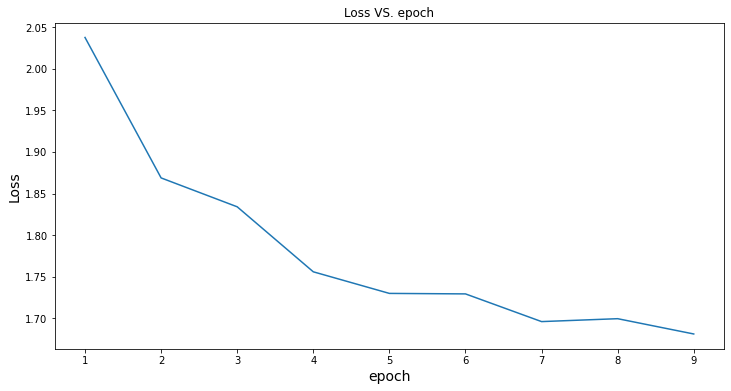

In [120]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=hist_loss[:, 0], y=hist_loss[:, 1])

plt.title('Loss VS. epoch')
plt.xlabel('epoch', fontdict=dict(fontsize=14))
plt.ylabel('Loss', fontdict=dict(fontsize=14))

plt.show()

In [121]:
pred_xtest = []

for batch in test_loader:
    dado, _ = batch
    pred_xtest.extend(net(dado))

pred_xtest = [np.argmax(p.detach().numpy()) for p in pred_xtest]

len(pred_xtest)

10000

In [122]:
ytest = [t[1] for t in test_set]
len(ytest)

10000

In [123]:
_ = classification_report(y_true=ytest,
                          y_pred=pred_xtest,
                          zero_division=0)
print(_)

              precision    recall  f1-score   support

           0       0.10      0.10      0.10       980
           1       0.10      0.13      0.11      1135
           2       0.11      0.12      0.12      1032
           3       0.11      0.12      0.11      1010
           4       0.10      0.10      0.10       982
           5       0.10      0.13      0.11       892
           6       0.10      0.12      0.11       958
           7       0.11      0.11      0.11      1028
           8       0.00      0.00      0.00       974
           9       0.09      0.08      0.09      1009

    accuracy                           0.10     10000
   macro avg       0.09      0.10      0.10     10000
weighted avg       0.09      0.10      0.10     10000



In [124]:
_ = f1_score(y_true=ytest,
             y_pred=pred_xtest,
             average='macro')
print(f'f1-score = {_:.4f}')

f1-score = 0.0964


$\blacksquare$ cqd